<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C4/C4.html"><img src="../data/C4_nav.png" width="100"  style="float:right;" alt="C4"></a>
<h1>SSM: Feature Smoothing</h1> 
</div>

<br/>

<p>
In this notebook, we study the effect of feature smoothing on structural properties of the resulting SSM. Parts of this notebook follow Section 4.2.2.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>.
    
<ul>    
<li><span style="color:black">
Meinard Müller, Frank Kurth, and Michael Clausen: <strong><a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2005_MuellerKurthClausen_ChromaAudioFeatures_WASPAA.pdf">Chroma-Based Statistical Audio Features for Audio Matching.</a></strong> Proceedings of the Workshop on Applications of Signal Processing (WASPAA), USA, 275&ndash;278, 2005. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_MuellerKC05_ChromaFeatures_WASPAA.txt"> Bibtex </a>
</span></li>    
    
<li><span style="color:black">
Meinard Müller and Sebastian Ewert: <strong><a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2011_MuellerEwert_ChromaToolbox_ISMIR.pdf">Chroma Toolbox: MATLAB implementations for extracting variants of chroma-based audio features.</a></strong> Proceedings of the International Conference on Music Information Retrieval (ISMIR), Miami, Florida, USA, pp. 215–220, 2011.
<br>
 <a href="https://www.audiolabs-erlangen.de/resources/MIR/chromatoolbox">Website of the Chroma Toolbox.</a>
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_MuellerEwert11_ChromaToolbox_ISMIR.txt"> Bibtex </a>
</span></li>
</ul>   

</p> 

## Example: Brahms

When computing an SSM, the given waveform-based audio recording is first transformed into a suitable feature representation, which captures specific acoustic and musical properties. As we have already discussed in the [FMP notebook on SSMs](../C4/C4S2_SSM.html), the structural properties of an SSM decisively depend on the feature type used. In this notebook, we study the influence of [feature smoothing and downsampling](../C3/C3S1_FeatureSmoothing.html) on an SSM. As an illustration, we consider an Ormandy recording of the [Hungarian Dance No. 5 by Johannes Brahms](../C4/C4S1_MusicStructureGeneral.html). 

Orchestral version (Ormandy, $A_1A_2B_1B_2CA_3B_3B_4D$) <br clear="all" />
<audio style="width: 320px;" src="../data/C4/FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.mp3" type="audio/mpeg" controls="controls"></audio>

Furthermore, as feature representation, we focus on [**chroma-based audio features**](../C3/C3S1_SpecLogFreq-Chromagram.html) as an example. Starting with a chroma representation of a given feature rate, we consider two parameters: a length parameter $L\in\mathbb{N}$ (given in frames), which is used to smooth or average the feature values over $L$ consecutive frames, as well as a downsampling parameter $H$, which reduces the feature rate by a factor of $H$. For details, we refer to the notebook on [temporal smoothing and downsampling](../C3/C3S1_FeatureSmoothing.html).

## Moderate Smoothing

In the following example, we start with [normalized](../C3/C3S1_FeatureNormalization.html) chroma features with a feature rate of $10$ Hz. The resulting SSM yields a very detailed description of repetitive structures. Even though the path structures that correspond to the repeating $A$-part and $B$-part segments are visible, the SSM looks quite noisy and many of the shown details are irrelevant when only the overall musical structure is of interest. Using a smoothing length of  $L=41$  (corresponding to roughly four seconds of audio) and a downsampling by $H=10$ (resulting in a feature rate of $1$ Hz), one obtains an SSM where many of the details have been smoothed out, and some of the structurally relevant path and block structures have become more prominent. 


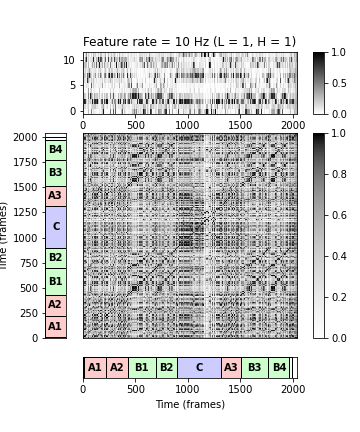
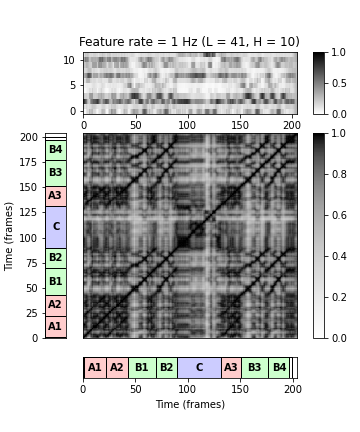

In [1]:
import numpy as np
import os, sys, librosa
from scipy import signal
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import IPython.display as ipd
import pandas as pd
from numba import jit


sys.path.append('..')
import libfmp.b
from libfmp.b import FloatingBox
import libfmp.c2
import libfmp.c3
import libfmp.c4

%matplotlib inline

# Annotation
filename = 'FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.csv'
fn_ann = os.path.join('..', 'data', 'C4', filename)
ann, color_ann = libfmp.c4.read_structure_annotation(fn_ann, fn_ann_color=filename)
 
# Waveform
fn_wav = os.path.join('..', 'data', 'C4', 'FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, Fs) 
x_duration = (x.shape[0])/Fs

# Chroma Feature Sequence and SSM (10 Hz)
C = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=2, hop_length=2205, n_fft=4410)
Fs_C = Fs/2205

# Chroma Feature Sequence and SSM (10 Hz)
L, H = 1, 1
X, Fs_feature = libfmp.c3.smooth_downsample_feature_sequence(C, Fs_C, 
                        filt_len=L, down_sampling=H)
X = libfmp.c3.normalize_feature_sequence(X, norm='2', threshold=0.001)
S = libfmp.c4.compute_sm_dot(X,X)
ann_frames = libfmp.c4.convert_structure_annotation(ann, Fs=Fs_feature)
fig, ax = libfmp.c4.plot_feature_ssm(X, 1, S, 1, ann_frames, x_duration*Fs_feature,
            label='Time (frames)', color_ann=color_ann, clim=[0,1], clim_X=[0,1],
            title='Feature rate = %0.0f Hz (L = %d, H = %d)'%(Fs_feature,L,H))
float_box = libfmp.b.FloatingBox()
float_box.add_fig(fig)

# Chroma Feature Sequence and SSM (10 Hz)
L, H = 41, 10
X, Fs_feature = libfmp.c3.smooth_downsample_feature_sequence(C, Fs_C, 
                        filt_len=L, down_sampling=H)
X = libfmp.c3.normalize_feature_sequence(X, norm='2', threshold=0.001)
S = libfmp.c4.compute_sm_dot(X,X)
ann_frames = libfmp.c4.convert_structure_annotation(ann, Fs=Fs_feature)
fig, ax = libfmp.c4.plot_feature_ssm(X, 1, S, 1, ann_frames, x_duration*Fs_feature, 
            label='Time (frames)', color_ann=color_ann, clim=[0,1], clim_X=[0,1],
            title='Feature rate = %0.0f Hz (L = %d, H = %d)'%(Fs_feature,L,H))
float_box.add_fig(fig)

float_box.show()

## Strong Smoothing

Further increasing the smoothing length and reducing the feature rate results in an emphasis of the rough harmonic content. This is shown in the SSMs when using $L=161$ ($16$ seconds) and $H=20$ (feature rate of $0.5$ Hz) and when using $L=321$ ($32$ seconds) and $H=40$ (feature rate of $0.25$ Hz). Using large smoothing windows, relevant path structures may be smeared out and lost for the subsequent steps. For other applications such as homogeneity-based structure analysis, however, averaging over large windows may be beneficial.

<!--<img src="../data/C4/FMP_C4_F10.png" width="900px" align="left" alt="FMP_C4_F10.png">-->


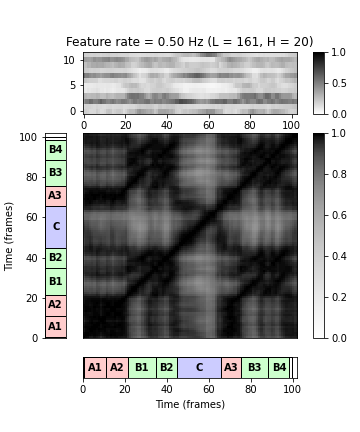
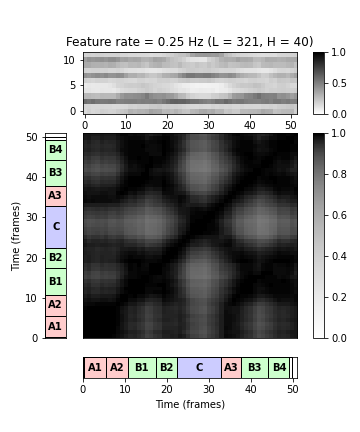

In [2]:
# Chroma Feature Sequence and SSM (0.5 Hz)
L, H = 161, 20
X, Fs_feature = libfmp.c3.smooth_downsample_feature_sequence(C, Fs_C, 
                        filt_len=L, down_sampling=H)
X = libfmp.c3.normalize_feature_sequence(X, norm='2', threshold=0.001)
S = libfmp.c4.compute_sm_dot(X,X)
ann_frames = libfmp.c4.convert_structure_annotation(ann, Fs=Fs_feature)
fig, ax = libfmp.c4.plot_feature_ssm(X, 1, S, 1, ann_frames, x_duration*Fs_feature, 
            label='Time (frames)', color_ann=color_ann, clim=[0,1], clim_X=[0,1],
            title='Feature rate = %0.2f Hz (L = %d, H = %d)'%(Fs_feature,L,H))
float_box = libfmp.b.FloatingBox()
float_box.add_fig(fig)
                  
# Chroma Feature Sequence and SSM (0.25 Hz)
L, H = 321, 40
X, Fs_feature = libfmp.c3.smooth_downsample_feature_sequence(C, Fs_C, 
                        filt_len=L, down_sampling=H)
X = libfmp.c3.normalize_feature_sequence(X, norm='2', threshold=0.001)
S = libfmp.c4.compute_sm_dot(X,X)
ann_frames = libfmp.c4.convert_structure_annotation(ann, Fs=Fs_feature)
fig, ax = libfmp.c4.plot_feature_ssm(X, 1, S, 1, ann_frames, x_duration*Fs_feature, 
            label='Time (frames)', color_ann=color_ann, clim=[0,1], clim_X=[0,1],
            title='Feature rate = %0.2f Hz (L = %d, H = %d)'%(Fs_feature,L,H))
float_box.add_fig(fig)

float_box.show()                  

## Median Filtering

In the notebook on [temporal smoothing](../C3/C3S1_FeatureSmoothing.html), we also discussed **median filtering** as an alternative to average filtering. Recall that median filtering tends to better preserve edges or sharp transient between homogeneous regions. In the following plot, we compare SSMs obtained by average and median filtering. 

SSMs obtained using average filtering


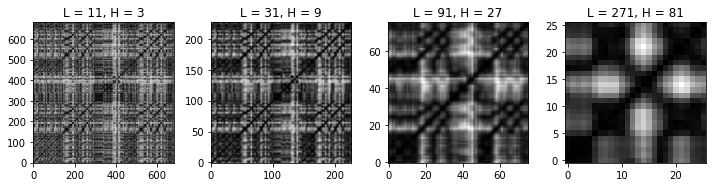

SSMs obtained using median filtering


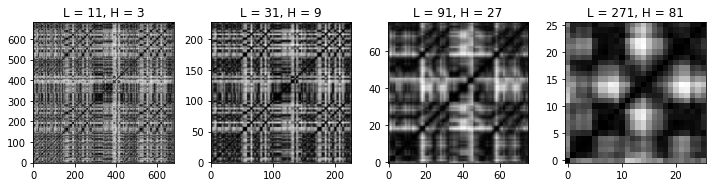

In [3]:
# Chroma Feature Sequence and SSM (0.5 Hz)
L_iter = [11, 31, 91, 271] 
H_iter = [ 3, 9, 27, 81]
num_iter = len(L_iter)

print('SSMs obtained using average filtering')
fig = plt.figure(figsize=(10,3))
for i in range(num_iter):
    L = L_iter[i]
    H = H_iter[i]
    X, Fs_feature = libfmp.c3.smooth_downsample_feature_sequence(C, Fs_C, 
                        filt_len=L, down_sampling=H)
    X = libfmp.c3.normalize_feature_sequence(X, norm='2', threshold=0.001)
    S = libfmp.c4.compute_sm_dot(X,X)
    ax = fig.add_subplot(1, num_iter, i+1)
    #ax = plt.subplot(1, num_iter, i+1)
    im = plt.imshow(S, cmap='gray_r', aspect='equal', origin='lower')
    ax.title.set_text('L = %d, H = %d'%(L,H))
plt.tight_layout() 
plt.show()

print('SSMs obtained using median filtering')
fig = plt.figure(figsize=(10,3))
for i in range(num_iter):
    L = L_iter[i]
    H = H_iter[i]
    X, Fs_feature = libfmp.c3.median_downsample_feature_sequence(C, Fs_C, 
                        filt_len=L, down_sampling=H)
    X = libfmp.c3.normalize_feature_sequence(X, norm='2', threshold=0.001)
    S = libfmp.c4.compute_sm_dot(X,X)
    ax = fig.add_subplot(1, num_iter, i+1)
    im = plt.imshow(S, cmap='gray_r', aspect='equal', origin='lower')
    ax.title.set_text('L = %d, H = %d'%(L,H))
plt.tight_layout() 
plt.show()

## Further Notes

In this notebook, we discussed the importance of the size of the analysis window and the feature rate. Knowing the temporal level of the music processing task is of great help for choosing suitable parameters. For example, for tasks such as extracting the musical structure from a given audio recording, smoothing and downsampling already on the feature level can lead to substantial improvements, not to speak of computational benefits in subsequent analysis steps. In particular, running time and memory requirements are important issues when employing concepts such as SSMs, which are quadratic in the length of the input feature sequence. Another important strategy for adjusting and reducing the feature rate is based on [**adaptive windowing**](../C6/C6S3_AdaptiveWindowing.html), where the analysis windows are determined by previously extracted onset and beat positions.

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>